In [3]:
import pandas as pd

train_file_path = r'D:\Datasets\TinyImageNet\train-00000-of-00001-1359597a978bc4fa.parquet'
valid_file_path = r'D:\Datasets\TinyImageNet\valid-00000-of-00001-70d52db3c749a935.parquet'

# Load train dataset
train_df = pd.read_parquet(train_file_path)

# Load validation dataset
valid_df = pd.read_parquet(valid_file_path)


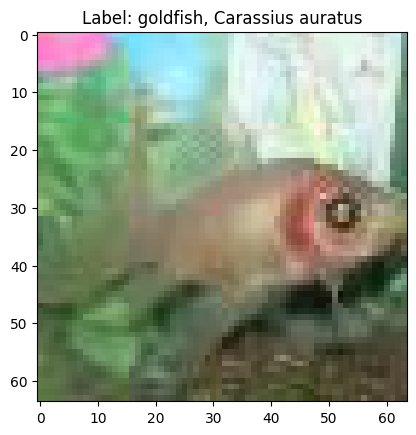

In [23]:
import json

with open('D:\\Datasets\\TinyImageNet\\dataset_infos.json', 'r') as f:
    dataset_infos = json.load(f)

# Extract label codes
label_codes = dataset_infos["Maysee--tiny-imagenet"]["features"]["label"]["names"]

# Import necessary libraries
import pandas as pd
from PIL import Image
import io
import sys

# Append directory to system path
sys.path.append('D:\\Datasets\\TinyImageNet')

# Import label to class name mapping dictionary
from classes import i2d

# Load the training and validation data
train_df = pd.read_parquet(r'D:\Datasets\TinyImageNet\train-00000-of-00001-1359597a978bc4fa.parquet')
valid_df = pd.read_parquet( r'D:\Datasets\TinyImageNet\valid-00000-of-00001-70d52db3c749a935.parquet')

# Convert the 'image' column from a dictionary to bytes
train_df['image'] = train_df['image'].apply(lambda x: x['bytes'])
valid_df['image'] = valid_df['image'].apply(lambda x: x['bytes'])

# Convert the labels in the DataFrame to the corresponding class names
train_df['class_name'] = train_df['label'].apply(lambda x: i2d[label_codes[x]])
valid_df['class_name'] = valid_df['label'].apply(lambda x: i2d[label_codes[x]])

# Convert the first image's raw bytes to a PIL Image object
image = Image.open(io.BytesIO(train_df.loc[0, 'image']))

# Get the label and class name of the first image
label = train_df.loc[0, 'label']
class_name = train_df.loc[0, 'class_name']


# Plot the image and its label
plt.imshow(image)
plt.title(f'Label: {class_name}')
plt.show()


Global seed set to 0


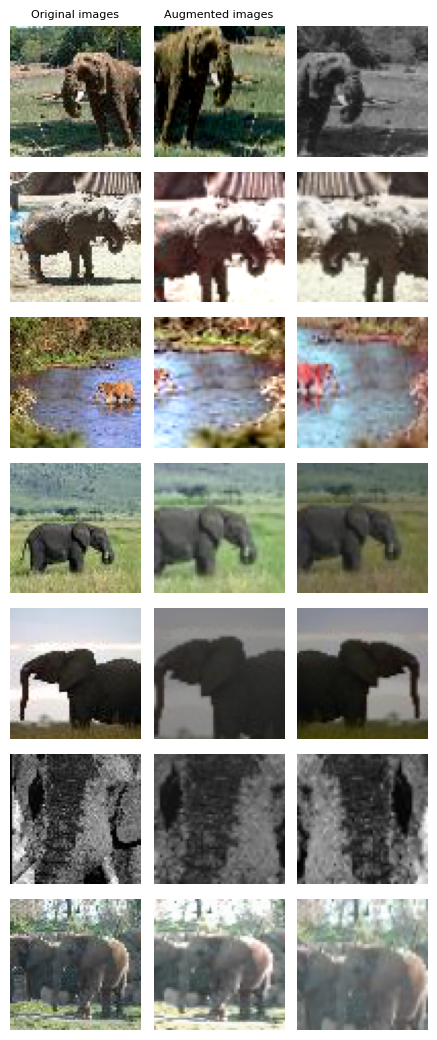

In [42]:
# Import config
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoSSL")
import yaml
from torchvision.transforms import RandomRotation,GaussianBlur,ColorJitter
from autoSSL.evaluate import eval_KNN,eval_linear,eval_KNNplot,pipe_collate
from autoSSL.models import BarlowTwins, BYOL, MoCo, SimCLR, SimSiam, VICReg ,Toymodel, pipe_model 
from autoSSL.utils import embedding_feature,ck_callback,dict2transformer,trans2multi,join_dir,ContinuousCSVLogger, load_config
from autoSSL.data import PipeDataset
from autoSSL.train import Trainer

from lightly.transforms import SimCLRTransform
from lightly.transforms.rotation import random_rotation_transform
import torchvision.transforms as T
import pytorch_lightning as pl
pl.seed_everything(0)


# Load the YAML file
with open('global.yaml', 'r') as file:
    global_config = yaml.safe_load(file)

# Write your experiment notebook name here
global_config["experiment"]="Magic_cube"   
global_config["dataset_dir"]="D:/Datasets/cifar10/train/"
global_config["prjhead_dim"]=[[512,2048, "BN","RELU"],[2048,2048,None,None]]    

global_config["loss_func"]="BarlowTwinsLoss"     
global_config["view_model"]="None"     
global_config["view"]=2 
global_config["stop_gradient"]=False   
global_config["optimizer"]="SGD"      
global_config["schedule"]="cos"   
global_config["model"]="Toymodel"
global_config["batch_size"]=256
global_config["input_size"]=32
global_config["max_epochs"]=50
 
#global_config["backbone"]="resnet18_pretrained"
global_SSL_augmentation=T.Compose([
    T.RandomResizedCrop(size=64, scale=(0.5, 1.0)),
    T.RandomApply([T.RandomRotation(degrees=90)], p=0),
    T.RandomHorizontalFlip(p= 0.5),
    T.RandomVerticalFlip(p=0),
    T.RandomApply([T.ColorJitter(
            brightness=0.4,contrast=0.4,saturation=0.4, hue=0.1)], p=0.8),
    T.RandomGrayscale(p=0.2),
    T.ToTensor(),
    T.Normalize(mean= [0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define global Training Augmentation



# Define the Testing Augmentation
test_SSL_augmentation=T.Compose([
    T.ToTensor(),
    T.Normalize(mean= [0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

p_knndata= PipeDataset(input_dir=global_config["path_to_test_TinyImageNet"], 
        augmentation=trans2multi(global_SSL_augmentation,view=2), 
        batch_size=global_config["batch_size"],num_workers=global_config["num_workers"])
#p_knndata=[p_knndata,10]  # The second number is the classes number of this datasets
 
p_knndata.plot([2,3,4,5,6,7,8])